# Cleaning pipeline - Credit Card Fraud Detection Dataset

---

## Dependencies

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler

---

## Dataset

In [8]:
file_path = "creditcard.csv"
df = pd.read_csv(file_path)

In [9]:
df_sample = df.head(10)
df_sample.to_csv("creditcard_sample.csv", index=False)
df_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: title={'center': 'Class distribution (0 = No fraud | 1 = Fraud)'}, xlabel='Class', ylabel='Count'>

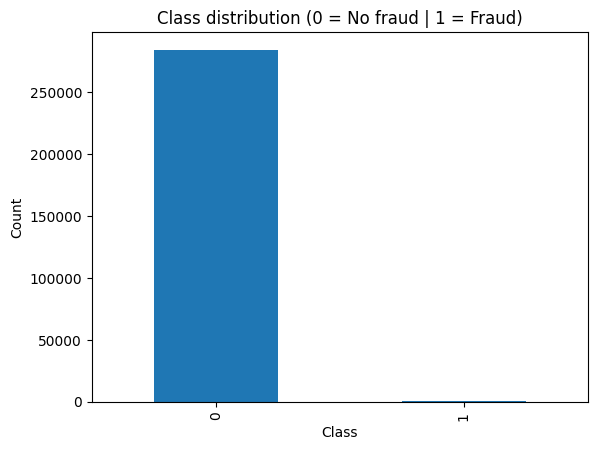

In [6]:
df['Class'].value_counts().plot(kind='bar', title='Class distribution (0 = No fraud | 1 = Fraud)', xlabel='Class', ylabel='Count')

In [7]:
fraud_cases = df[df['Class'] == 1].shape[0]
normal_cases = df[df['Class'] == 0].shape[0]
print(f"Fraud cases : {fraud_cases}")
print(f"No fraud cases : {normal_cases}")
print(f"Fraud proportion : {fraud_cases / (fraud_cases + normal_cases) * 100:.2f}%")
print(f"No fraud proportion : {normal_cases / (fraud_cases + normal_cases) * 100:.2f}%")

Fraud cases : 492
No fraud cases : 284315
Fraud proportion : 0.17%
No fraud proportion : 99.83%


We saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:

- **Overfitting**: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
- **Wrong Correlations**: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

C:\Users\hugop\AppData\Local\Temp\ipykernel_19108\3028048997.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\hugop\AppData\Local\Temp\ipykernel_19108\3028048997.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


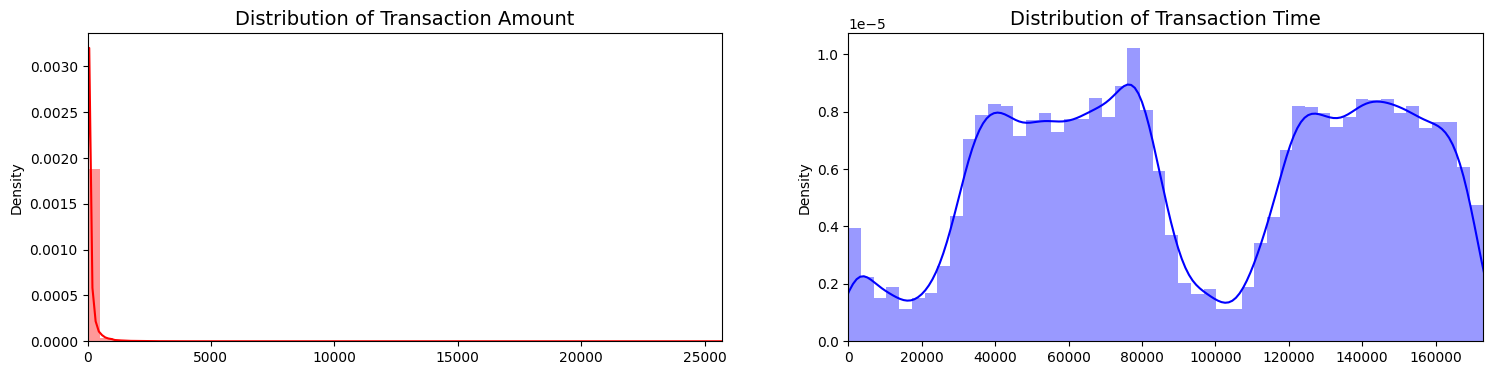

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Scaling

In [9]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Features and target separation

In [11]:
X = df.drop(columns=['Class'])
y = df['Class']

### Dataset train/test split

In [12]:
# We have to split our dataset into train and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_ori_train, X_ori_test, y_ori_train, y_ori_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set: {X_ori_train.shape[0]} samples")
print(f"Test set: {X_ori_test.shape[0]} samples")

Train set: 199364 samples
Test set: 85443 samples


### CSV files save

In [13]:
def create_csv_files(X, y, folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    X.to_csv(f"./{folder_name}/X.csv", index=False)
    y.to_csv(f"./{folder_name}/y.csv", index=False)

In [14]:
create_csv_files(X_ori_train, y_ori_train, "original-dataset/train")
create_csv_files(X_ori_test, y_ori_test, "original-dataset/test")

---

## Undersampling

<Axes: title={'center': 'Undersampled distribution'}, xlabel='Class'>

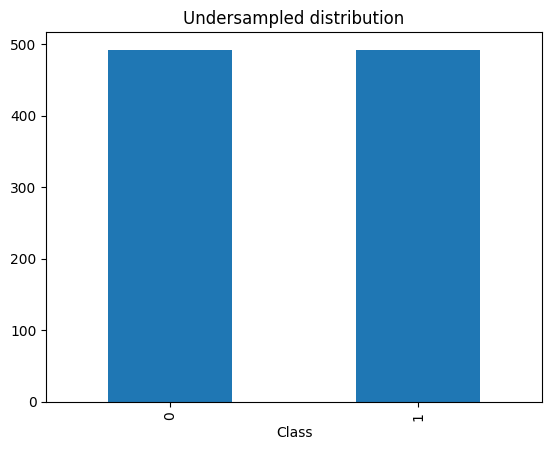

In [15]:
# Undersampled dataset creation
undersample = RandomUnderSampler(sampling_strategy=1)
X_under, y_under = undersample.fit_resample(X, y)
df_under = pd.concat([pd.DataFrame(X_under, columns=X.columns), pd.DataFrame(y_under, columns=['Class'])], axis=1)

df_under['Class'].value_counts().plot(kind='bar', title='Undersampled distribution')

In [16]:
df_under.shape

(984, 31)

### Features correlation

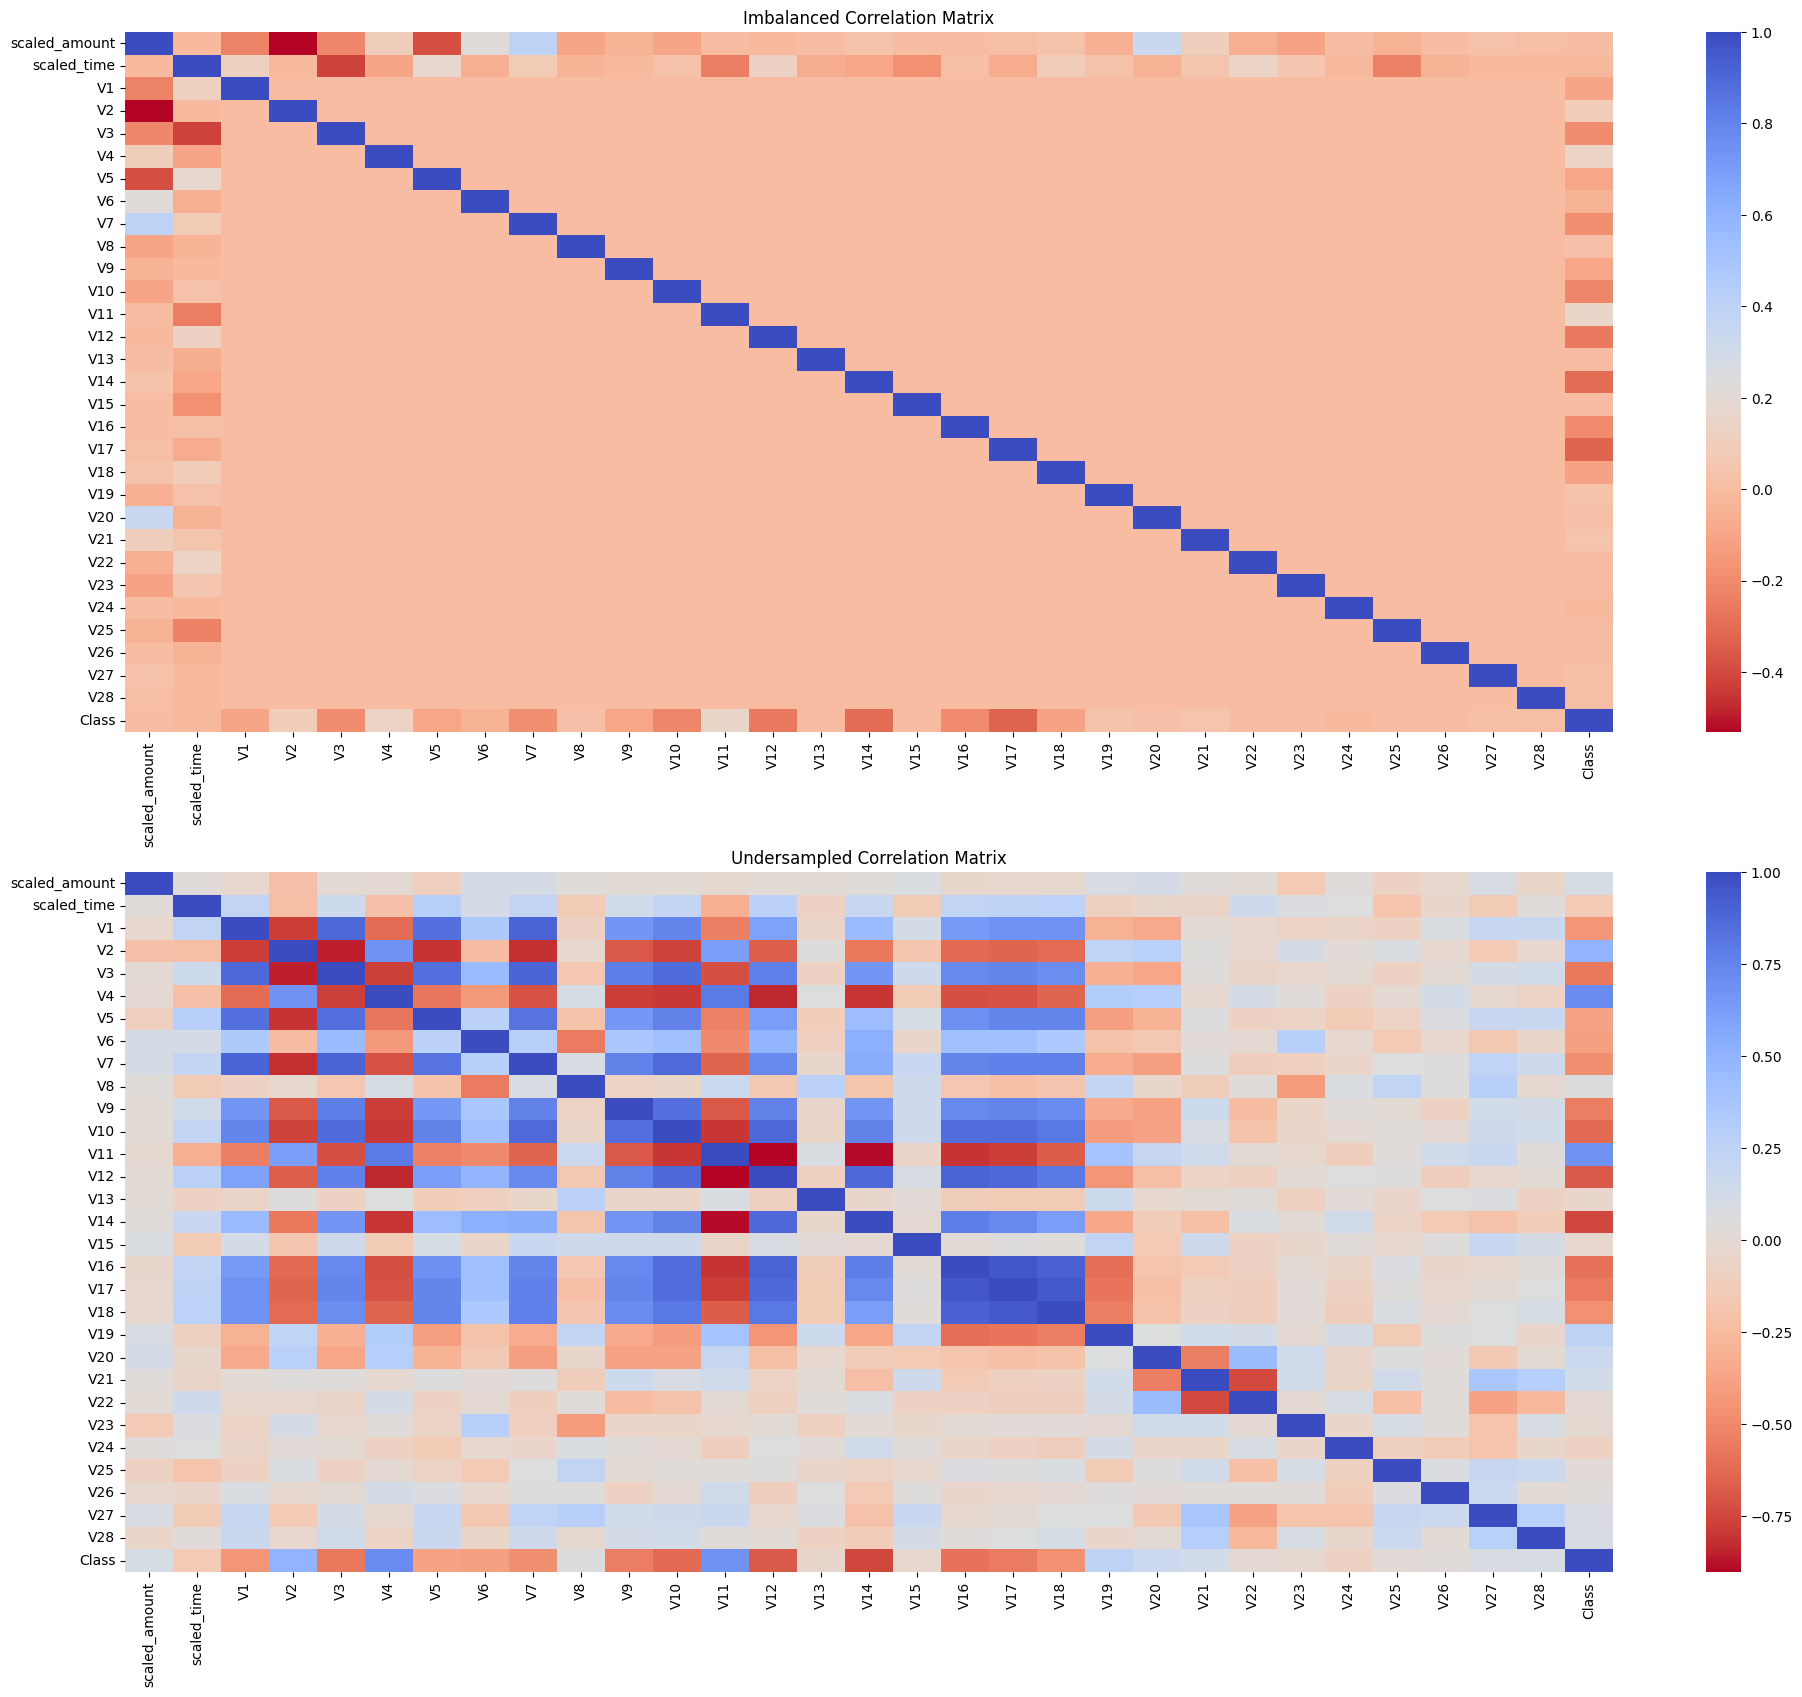

In [17]:
# Correlation matrix visualization
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

# Correlation matrix before undersampling
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False, fmt=".2f", ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix")

# Correlation matrix after undersampling
sns.heatmap(df_under.corr(), cmap='coolwarm_r', annot=False, fmt=".2f", ax=ax2)
ax2.set_title("Undersampled Correlation Matrix")
plt.show()

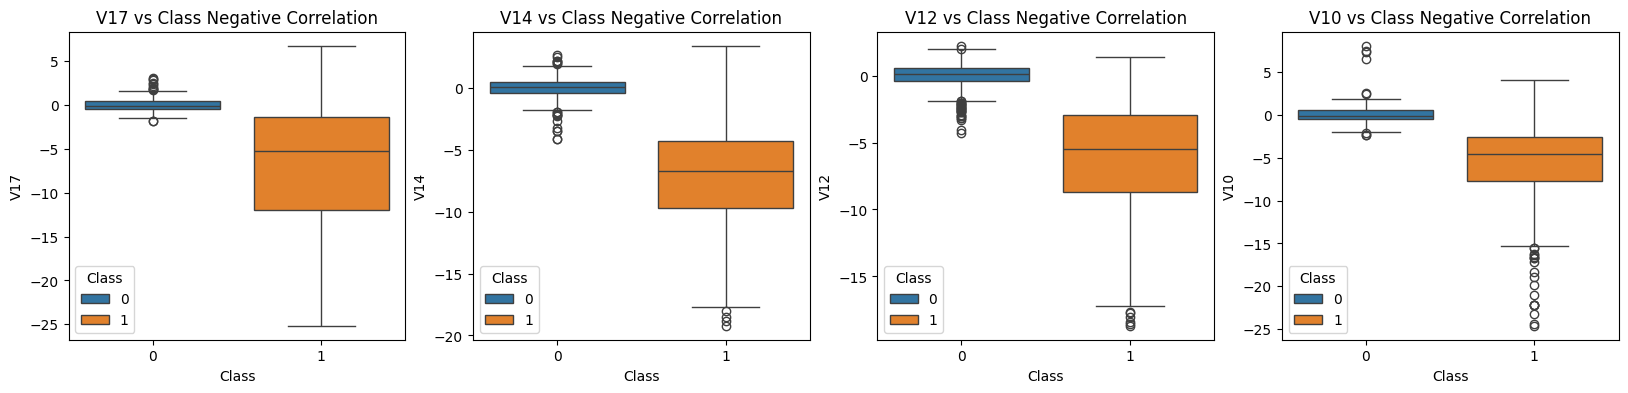

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df_under, hue="Class", ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df_under, hue="Class", ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=df_under, hue="Class", ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=df_under, hue="Class", ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

📉 Features with Negative Correlation to Fraud:

(V17, V14, V12, V10)

These variables are negatively correlated with the target class.
This means that lower values are more likely to be associated with fraudulent transactions.
In the boxplots, we observe that for fraud cases (Class = 1), these variables tend to have lower distributions compared to non-fraud cases.

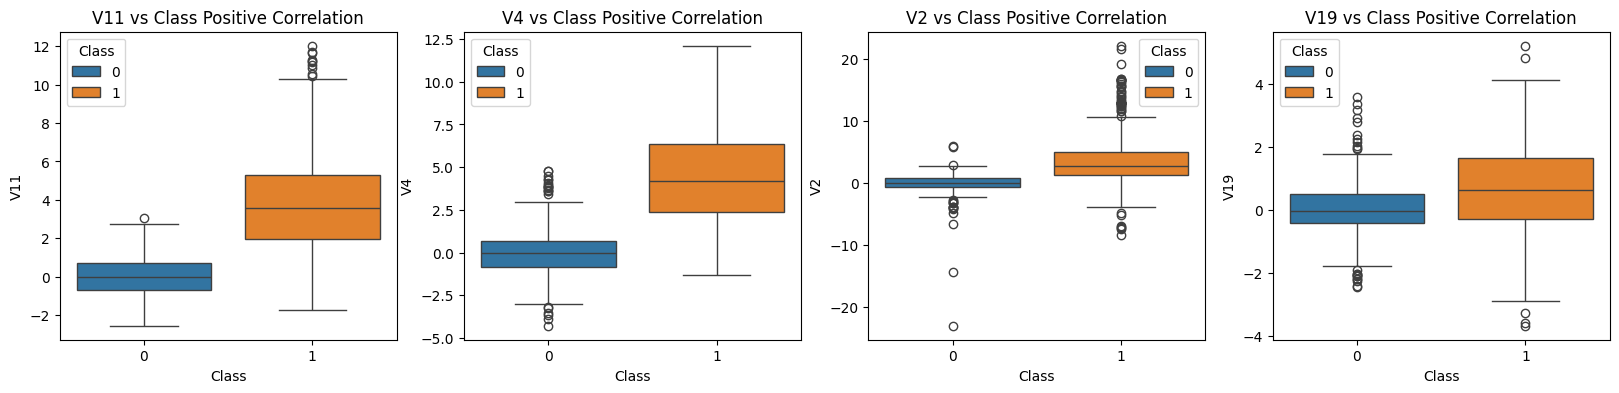

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df_under, hue="Class", ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df_under, hue="Class", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=df_under, hue="Class", ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=df_under, hue="Class", ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

📈 Features with Positive Correlation to Fraud:

(V11, V4, V2, V19)

These variables show a positive correlation with fraud.
Higher values increase the likelihood of a transaction being fraudulent.
In the boxplots, the values for fraud cases tend to be higher than those for legitimate ones.

🎯 Relevance for Modeling:

These strongly correlated features are likely to be particularly informative for classification models, especially linear models and tree-based algorithms.

### Undersampled dataset train/test split

In [20]:
# We have to split our dataset into train and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

print(f"Train set: {X_under_train.shape[0]} samples")
print(f"Test set: {X_under_test.shape[0]} samples")

Train set: 688 samples
Test set: 296 samples


### CSV files save

In [21]:
create_csv_files(X_under_train, y_under_train, "undersampled-dataset/train")
create_csv_files(X_under_test, y_under_test, "undersampled-dataset/test")

---

## Oversampling

### SMOTE Technique (Over-Sampling):

**SMOTE** stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

#### Cross Validation Overfitting Mistake:
#### Overfitting during Cross Validation:  
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
#### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


#### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

Class
0    199008
1    199008
Name: count, dtype: int64
X_over_train shape : (398016, 30)
X_test shape : (85443, 30)


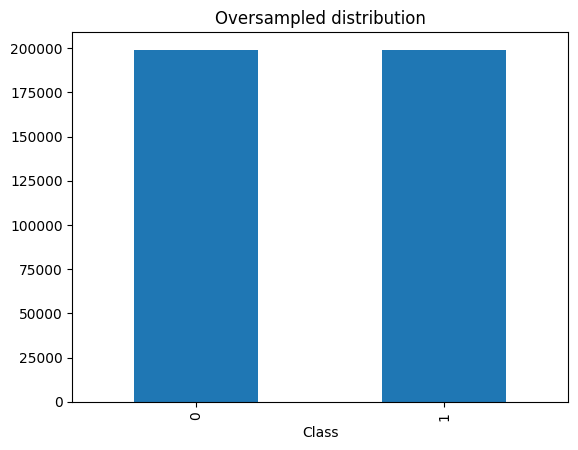

In [22]:
# Applying SMOTE only on the training set
smote = SMOTE(random_state=42)
X_over_train, y_over_train = smote.fit_resample(X_ori_train, y_ori_train)

y_over_train.value_counts().plot(kind='bar', title='Oversampled distribution')

print(y_over_train.value_counts())
print(f"X_over_train shape : {X_over_train.shape}")
print(f"X_test shape : {X_ori_test.shape}")

In [23]:
create_csv_files(X_over_train, y_over_train, "oversampled-dataset/train")
create_csv_files(X_ori_test, y_ori_test, "oversampled-dataset/test")

---

## Conclusion

Now that we have prepared three different versions of the dataset — the original (cleaned and split), the undersampled version, and the oversampled version using SMOTE — we are ready to begin model evaluation.

Each dataset version serves a specific purpose:

- The original dataset preserves the real-world distribution of fraud cases, making it ideal for evaluating models' natural performance in detecting rare events.

- The undersampled dataset allows us to test algorithms that perform well with balanced data but may be biased when facing class imbalance. It's also useful for models that are sensitive to training time or require smaller input sizes.

- The oversampled dataset provides a way to train models on more data while maintaining class balance, which can benefit algorithms that need larger datasets to perform well and are not biased by synthetic examples.

In the next steps, we will test a variety of machine learning models. Some will be more suitable for small datasets, others may be robust to class imbalance, and some will benefit from having more training samples. Comparing their performance across all three dataset versions will help us better understand which algorithms are most appropriate for fraud detection in this context.